<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB_3 Оценки методом моментов

## 1. Метод моментов для равномерного распределения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.stats import moment
from scipy.optimize import minimize
import math

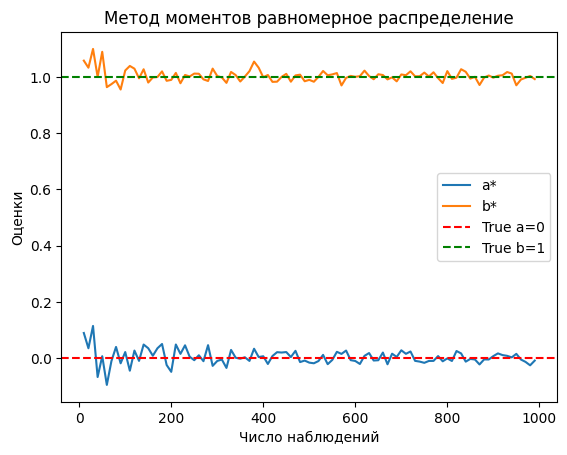

In [2]:
def method_of_moments_uniform(data):
    m1 = np.mean(data)
    m2 = np.mean(data ** 2)

    # Решение системы уравнений для нахождения a и b
    a_hat = m1 - np.sqrt(3 * (m2 - m1 ** 2))
    b_hat = m1 + np.sqrt(3 * (m2 - m1 ** 2))

    return a_hat, b_hat

# Генерация выборок для равномерного распределения
def generate_uniform_samples(n, a=0, b=1):
    return np.random.uniform(a, b, n)

# Функция для построения графика зависимости оценок от величины выборки
def plot_estimations_uniform():
    sample_sizes = range(10, 1000, 10)
    a_estimations = []
    b_estimations = []

    for n in sample_sizes:
        data = generate_uniform_samples(n)
        a_hat, b_hat = method_of_moments_uniform(data)
        a_estimations.append(a_hat)
        b_estimations.append(b_hat)

    plt.plot(sample_sizes, a_estimations, label="a*")
    plt.plot(sample_sizes, b_estimations, label="b*")
    plt.axhline(0, color='red', linestyle='--', label="True a=0")
    plt.axhline(1, color='green', linestyle='--', label="True b=1")
    plt.xlabel("Число наблюдений")
    plt.ylabel("Оценки")
    plt.legend()
    plt.title("Метод моментов равномерное распределение")
    plt.show()

# Построение графика
plot_estimations_uniform()

## 2. Обобщенный метод моментов для равномерного распределения

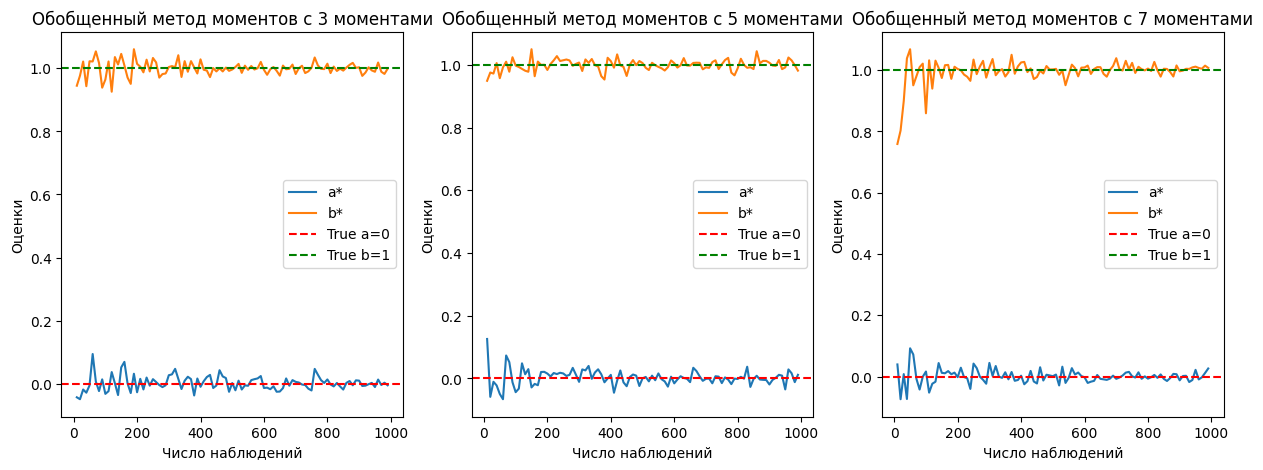

In [3]:
def theoretical_moments_uniform(a, b, num_moments):
    moments = []
    for k in range(1, num_moments + 1):
        moment_k = (b ** k - a ** k) / (k * (b - a))
        moments.append(moment_k)
    return moments

def generalized_moments_uniform(data, num_moments=3):
    """Обобщённый метод моментов для равномерного распределения"""
    empirical_moments = [np.mean(data ** k) for k in range(1, num_moments + 1)]

    if num_moments >= 2:
        m1 = empirical_moments[0]
        m2 = empirical_moments[1]

        a_hat = m1 - np.sqrt(3 * (m2 - m1**2))
        b_hat = m1 + np.sqrt(3 * (m2 - m1**2))

        return a_hat, b_hat
    else: raise ValueError("Number of moments must be at least 2")

def generate_uniform_samples(n, a=0, b=1):
    return np.random.uniform(a, b, n)

def plot_generalized_estimations_uniform(num_moments):
    sample_sizes = range(10, 1000, 10)
    a_estimations = []
    b_estimations = []

    for n in sample_sizes:
        data = generate_uniform_samples(n)
        a_hat, b_hat = generalized_moments_uniform(data, num_moments)
        a_estimations.append(a_hat)
        b_estimations.append(b_hat)

    plt.plot(sample_sizes, a_estimations, label="a*")
    plt.plot(sample_sizes, b_estimations, label="b*")
    plt.axhline(0, color='red', linestyle='--', label="True a=0")
    plt.axhline(1, color='green', linestyle='--', label="True b=1")
    plt.xlabel("Число наблюдений")
    plt.ylabel("Оценки")
    plt.legend()
    plt.title(f"Обобщенный метод моментов с {num_moments} моментами")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plot_generalized_estimations_uniform(num_moments=3)
plt.subplot(1, 3, 2)
plot_generalized_estimations_uniform(num_moments=5)
plt.subplot(1, 3, 3)
plot_generalized_estimations_uniform(num_moments=7)

plt.show()

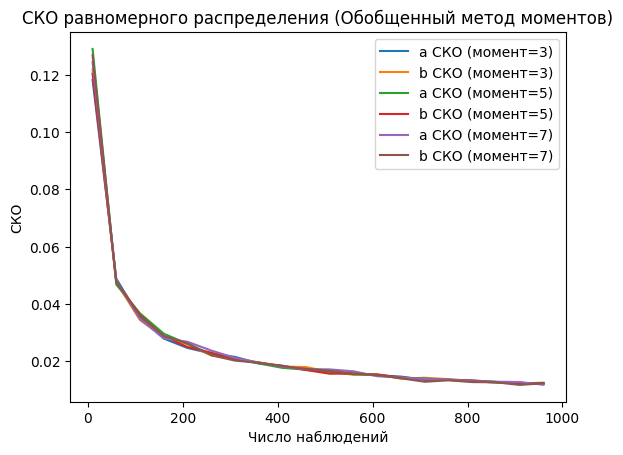

In [4]:
def theoretical_moments_uniform(a, b, num_moments):
    moments = []
    for k in range(1, num_moments + 1):
        moment_k = (b**k - a**k) / (k * (b - a))
        moments.append(moment_k)
    return moments

def generalized_moments_uniform(data, num_moments=3):
    """Обобщённый метод моментов для равномерного распределения"""
    empirical_moments = [np.mean(data ** k) for k in range(1, num_moments + 1)]

    if num_moments >= 2:
        m1 = empirical_moments[0]
        m2 = empirical_moments[1]

        a_hat = m1 - np.sqrt(3 * (m2 - m1**2))
        b_hat = m1 + np.sqrt(3 * (m2 - m1**2))

        return a_hat, b_hat
    else:
        raise ValueError("Number of moments must be at least 2")

def generate_uniform_samples(n, a=0, b=1):
    return np.random.uniform(a, b, n)

def compute_rmse_uniform(sample_size, num_samples=1000, num_moments=3):
    a_errors = []
    b_errors = []

    for _ in range(num_samples):
        data = generate_uniform_samples(sample_size)
        a_hat, b_hat = generalized_moments_uniform(data, num_moments)
        a_errors.append((a_hat - 0)**2)
        b_errors.append((b_hat - 1)**2)

    a_rmse = np.sqrt(np.mean(a_errors))
    b_rmse = np.sqrt(np.mean(b_errors))

    return a_rmse, b_rmse

def plot_rmse_uniform(num_moments_list):
    sample_sizes = range(10, 1000, 50)

    for num_moments in num_moments_list:
        a_rmses = []
        b_rmses = []
        for n in sample_sizes:
            a_rmse, b_rmse = compute_rmse_uniform(n, num_samples=1000, num_moments=num_moments)
            a_rmses.append(a_rmse)
            b_rmses.append(b_rmse)

        plt.plot(sample_sizes, a_rmses, label=f"a СКО (момент={num_moments})")
        plt.plot(sample_sizes, b_rmses, label=f"b СКО (момент={num_moments})")

    plt.xlabel("Число наблюдений")
    plt.ylabel("СКО")
    plt.legend()
    plt.title("СКО равномерного распределения (Обобщенный метод моментов)")
    plt.show()

plot_rmse_uniform([3, 5, 7])

In [5]:
def method_of_moments(data):
    """Оценка параметра λ методом моментов."""
    mean_x = np.mean(data)
    return 1 / mean_x

def generalized_method_of_moments(data, moments):
    """Оценка параметра λ обобщенным методом моментов."""
    estimates = []
    for moment in moments:
        if moment == 1:
            estimates.append(1 / np.mean(data))
        elif moment == 2:
            estimates.append(np.sqrt(2 / np.mean(data**2)))
        elif moment == 3:
            estimates.append((6 / np.mean(data**3))**(1/3))
        elif moment == 4:
            estimates.append((24 / np.mean(data**4))**(1/4))
        elif moment == 5:
            estimates.append((120 / np.mean(data**5))**(1/5))
        elif moment == 6:
            estimates.append((720 / np.mean(data**6))**(1/6))
        elif moment == 7:
            estimates.append((5040 / np.mean(data**7))**(1/7))
    return estimates

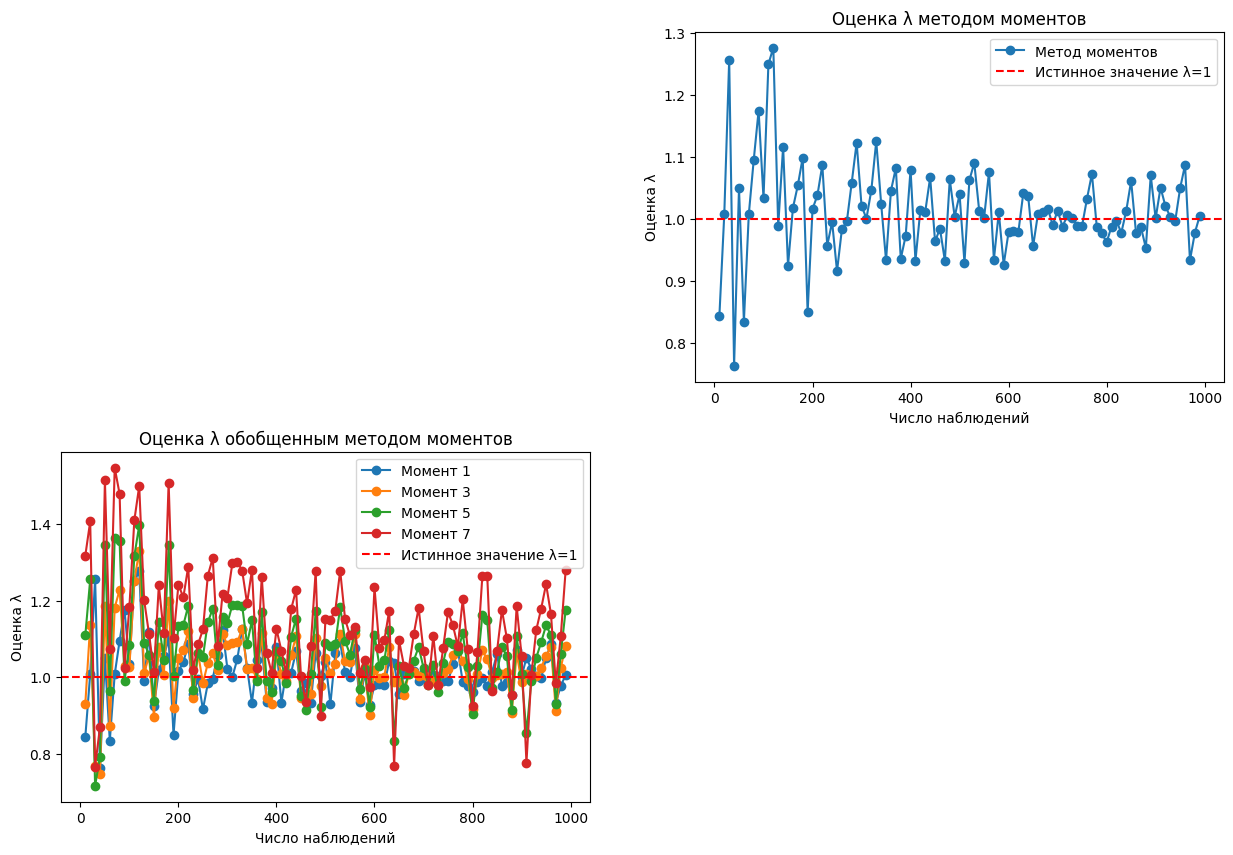

In [6]:
sample_sizes = range(10, 1000, 10)
std_devs = []
lambda_moments = []
lambda_gmm = []

for size in sample_sizes:
    sample = np.random.exponential(scale=1.0, size=size)
    std_devs.append(np.std(sample))

    lambda_moments.append(method_of_moments(sample))

    gmm_estimates = generalized_method_of_moments(sample, [1, 3, 5, 7])
    lambda_gmm.append(gmm_estimates)

# Построение графиков
plt.figure(figsize=(15, 10))

# График оценок λ методом моментов
plt.subplot(2, 2, 2)
plt.plot(sample_sizes, lambda_moments, marker='o', label='Метод моментов')
plt.title('Оценка λ методом моментов')
plt.xlabel('Число наблюдений')
plt.ylabel('Оценка λ')
plt.axhline(y=1, color='r', linestyle='--', label='Истинное значение λ=1')
plt.legend()

# График оценок λ обобщенным методом моментов
plt.subplot(2, 2, 3)
for i in range(len(lambda_gmm[0])):  # Проходим по всем моментам
    plt.plot(sample_sizes, [l[i] for l in lambda_gmm], marker='o', label=f'Момент {i*2+1}')
plt.title('Оценка λ обобщенным методом моментов')
plt.xlabel('Число наблюдений')
plt.ylabel('Оценка λ')
plt.axhline(y=1, color='r', linestyle='--', label='Истинное значение λ=1')
plt.legend()

# Показать графики
plt.show()